In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM,Dense

In [2]:
data = pd.read_csv('TAP.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,7/22/2015,71.269997,71.940002,71.169998,71.360001,63.412666,739700
1,7/23/2015,71.260002,71.260002,70.699997,70.820000,62.932804,1164800
2,7/24/2015,70.860001,71.010002,69.680000,70.000000,62.204117,715800
3,7/27/2015,69.519997,69.709999,68.570000,69.540001,61.795364,1404100
4,7/28/2015,69.639999,69.709999,68.629997,69.309998,61.590973,1337100


In [3]:
data1 = data.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'])
data1.head()

,Date,Close
0,7/22/2015,71.360001
1,7/23/2015,70.820000
2,7/24/2015,70.000000
3,7/27/2015,69.540001
4,7/28/2015,69.309998


Text(0.5, 1.0, 'TAP (MillerCoors) Stock History')

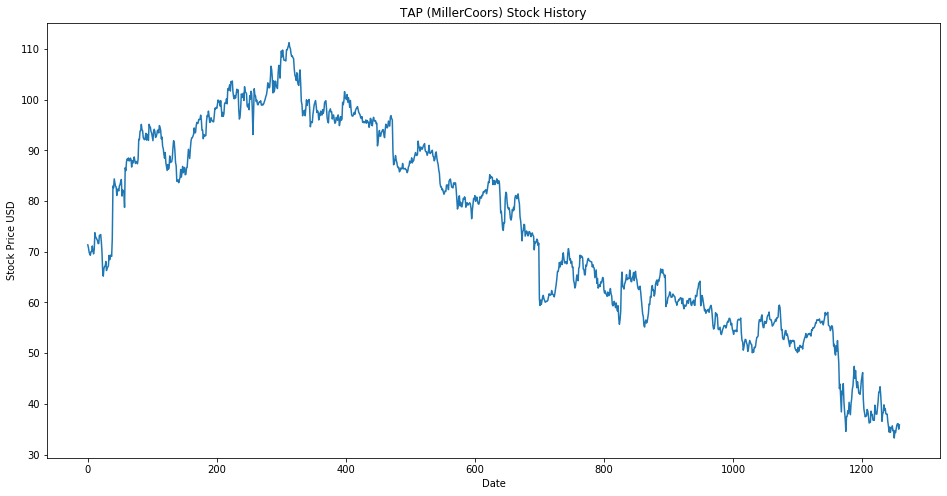

In [4]:
data1["Date"]=pd.to_datetime(data1.Date,format="%m/%d/%Y")
plt.figure(figsize=(16,8))
plt.plot(data1["Close"])
plt.ylabel('Stock Price USD')
plt.xlabel('Date')
plt.title('TAP (MillerCoors) Stock History')

In [5]:
model_df = data1.iloc[0:619,:]
model_df.head()

,Date,Close
0,2015-07-22,71.360001
1,2015-07-23,70.820000
2,2015-07-24,70.000000
3,2015-07-27,69.540001
4,2015-07-28,69.309998


In [6]:
from sklearn.model_selection import train_test_split

input_data = []
output_data = []
x = 365

for i in range(x,len(model_df)):
    input_data.append(model_df.loc[i-x:i,"Close"])
    output_data.append(model_df.loc[i,"Close"])

X = np.array(input_data)
y = np.array(output_data).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23)

In [7]:
# Scale the data
X_scaler=MinMaxScaler(feature_range=(0,1)).fit(X_train)
y_scaler=MinMaxScaler(feature_range=(0,1)).fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [8]:
# Reshape training data to fit model
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0],X_train_scaled.shape[1],1))

In [9]:
model=Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(X_train_scaled.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train_scaled,y_train_scaled,epochs=10,batch_size=65,verbose=2)

Train on 190 samples
Epoch 1/10
190/190 - 6s - loss: 0.3364
Epoch 2/10
190/190 - 1s - loss: 0.1329
Epoch 3/10
190/190 - 1s - loss: 0.0263
Epoch 4/10
190/190 - 1s - loss: 0.0330
Epoch 5/10
190/190 - 1s - loss: 0.0311
Epoch 6/10
190/190 - 1s - loss: 0.0105
Epoch 7/10
190/190 - 1s - loss: 0.0133
Epoch 8/10
190/190 - 1s - loss: 0.0177
Epoch 9/10
190/190 - 1s - loss: 0.0153
Epoch 10/10
190/190 - 1s - loss: 0.0100


In [10]:
# Reshape testing data to fit new model
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

In [11]:
# Evaluate the model
model_loss = model.evaluate(X_test_scaled, y_test_scaled, verbose=2)
print(f"Loss: {model_loss}")

64/1 - 1s - loss: 0.0059
Loss: 0.004824198316782713


In [12]:
# Predict y values for test data, then see how closely they match actuals
predicted_closing_price=model.predict(X_test_scaled)
predicted_closing_price=y_scaler.inverse_transform(predicted_closing_price)
predicted_closing_price

array([[92.96315 ],
       [95.9759  ],
       [89.500336],
       [89.93748 ],
       [90.250084],
       [82.01957 ],
       [94.62073 ],
       [88.21777 ],
       [95.01665 ],
       [82.33201 ],
       [97.0401  ],
       [95.56228 ],
       [87.06302 ],
       [96.3951  ],
       [83.457375],
       [97.33466 ],
       [96.42426 ],
       [96.1818  ],
       [94.09977 ],
       [94.524574],
       [90.16661 ],
       [95.87347 ],
       [82.582375],
       [87.55117 ],
       [89.6389  ],
       [90.08216 ],
       [87.63801 ],
       [81.933235],
       [81.61331 ],
       [81.7293  ],
       [93.10897 ],
       [90.89326 ],
       [89.12971 ],
       [84.52762 ],
       [87.35727 ],
       [97.000046],
       [88.779465],
       [96.19989 ],
       [96.88394 ],
       [81.642815],
       [95.42649 ],
       [94.50872 ],
       [94.91044 ],
       [81.55214 ],
       [88.19707 ],
       [90.107086],
       [81.342705],
       [89.856674],
       [81.734795],
       [92.96594 ],


In [13]:
predicted_stock_price = [predicted_closing_price[i][0] for i in range(len(predicted_closing_price))]

In [14]:
new_data = pd.DataFrame({"Predicted": predicted_stock_price})
new_data

,Predicted
0,92.963150
1,95.975899
2,89.500336
3,89.937477
4,90.250084
...,...
59,89.966599
60,94.574089
61,94.578918
62,94.007027


In [15]:
actual_values = y_test_scaled.reshape((y_test_scaled.shape[0], y_test_scaled.shape[1]))
actual_values = y_scaler.inverse_transform(actual_values)
actual_values

array([[92.519997],
       [96.190002],
       [89.410004],
       [90.029999],
       [89.959999],
       [80.529999],
       [96.32    ],
       [89.110001],
       [95.949997],
       [82.07    ],
       [96.790001],
       [95.470001],
       [87.889999],
       [98.279999],
       [80.870003],
       [96.989998],
       [98.230003],
       [96.459999],
       [96.019997],
       [94.860001],
       [89.389999],
       [96.989998],
       [81.449997],
       [86.410004],
       [90.5     ],
       [89.489998],
       [87.959999],
       [81.82    ],
       [79.199997],
       [81.18    ],
       [94.080002],
       [86.849998],
       [85.949997],
       [83.18    ],
       [86.199997],
       [99.519997],
       [86.5     ],
       [95.43    ],
       [97.099998],
       [80.589996],
       [95.589996],
       [96.040001],
       [95.580002],
       [79.32    ],
       [86.379997],
       [91.      ],
       [78.580002],
       [90.400002],
       [79.489998],
       [95.169998],


In [16]:
actuals = [actual_values[i][0] for i in range(len(actual_values))]
new_data["Actual"] = actuals
new_data

,Predicted,Actual
0,92.963150,92.519997
1,95.975899,96.190002
2,89.500336,89.410004
3,89.937477,90.029999
4,90.250084,89.959999
...,...,...
59,89.966599,86.660004
60,94.574089,95.050003
61,94.578918,95.260002
62,94.007027,89.779999


In [17]:
inputs = []

for i in range(619,len(data1)):
    inputs.append(data1.loc[i-x:i,"Close"])

X_forecast = np.array(inputs)
X_forecast_scaled = X_scaler.transform(X_forecast)

In [18]:
# Reshape data to use in model
X_forecast_scaled = X_forecast_scaled.reshape((X_forecast_scaled.shape[0],X_forecast_scaled.shape[1],1))

In [19]:
forecasted_closing_price = model.predict(X_forecast_scaled)
forecasted_closing_price=y_scaler.inverse_transform(forecasted_closing_price)
forecasted_closing_price

array([[82.686134],
       [82.811455],
       [82.981674],
       [83.16218 ],
       [83.40005 ],
       [83.64082 ],
       [83.88702 ],
       [84.11963 ],
       [84.33525 ],
       [84.48447 ],
       [84.59525 ],
       [84.68574 ],
       [84.73912 ],
       [84.77481 ],
       [84.80077 ],
       [84.842705],
       [84.858284],
       [84.85082 ],
       [84.86001 ],
       [84.85548 ],
       [84.75261 ],
       [84.48069 ],
       [84.11847 ],
       [83.64795 ],
       [83.066505],
       [82.42862 ],
       [81.83295 ],
       [81.28529 ],
       [80.94178 ],
       [80.79353 ],
       [80.78759 ],
       [80.80689 ],
       [80.807365],
       [80.80379 ],
       [80.78923 ],
       [80.737236],
       [80.63874 ],
       [80.48446 ],
       [80.318726],
       [80.203835],
       [80.12116 ],
       [80.087906],
       [80.07528 ],
       [80.151726],
       [80.299484],
       [80.48024 ],
       [80.67061 ],
       [80.8743  ],
       [81.09063 ],
       [81.266426],


In [20]:
forecast = [forecasted_closing_price[i][0] for i in range(len(forecasted_closing_price))]

In [21]:
forecasted_stock = data1.iloc[619:,:]
forecasted_stock

,Date,Close
619,2018-01-04,82.000000
620,2018-01-05,82.930000
621,2018-01-08,83.820000
622,2018-01-09,83.629997
623,2018-01-10,85.209999
...,...,...
1254,2020-07-15,35.770000
1255,2020-07-16,36.070000
1256,2020-07-17,36.080002
1257,2020-07-20,35.000000


In [22]:
forecasted_stock["Prediction"] = forecast
forecasted_stock

C:\Users\Joymode\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,Close,Prediction
619,2018-01-04,82.000000,82.686134
620,2018-01-05,82.930000,82.811455
621,2018-01-08,83.820000,82.981674
622,2018-01-09,83.629997,83.162178
623,2018-01-10,85.209999,83.400047
...,...,...,...
1254,2020-07-15,35.770000,56.318306
1255,2020-07-16,36.070000,56.311020
1256,2020-07-17,36.080002,56.318222
1257,2020-07-20,35.000000,56.324303


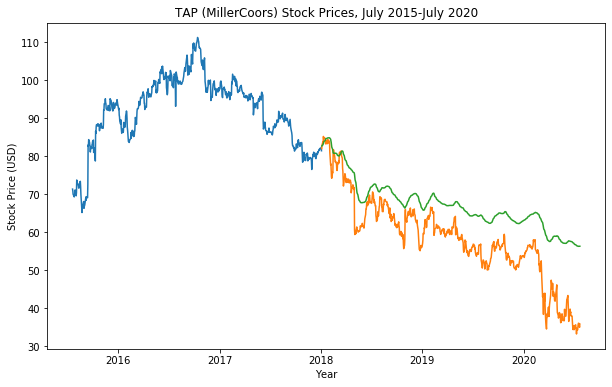

In [23]:
model_df = model_df.set_index("Date")
forecasted_stock = forecasted_stock.set_index("Date")
plt.figure(figsize=(10,6))
plt.xlabel('Year')
plt.ylabel('Stock Price (USD)')
plt.plot(model_df["Close"])
plt.plot(forecasted_stock[['Close',"Prediction"]])
plt.title("TAP (MillerCoors) Stock Prices, July 2015-July 2020")
plt.savefig('TAP_Prediction.png')